In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'C:\Users\nivet\Downloads\add.csv')

In [8]:
data.head()

,x,y,sum
0,1.0,1.0,2.0
1,4.0,4.0,8.0
2,6.0,6.0,12.0
3,10.0,10.0,20.0
4,30.0,30.0,60.0


In [9]:
data.tail()

,x,y,sum
17,400.0,45.7,445.7
18,34.6,56.9,91.5
19,400.5,356.0,756.5
20,45.7,123.7,169.4
21,1000.0,3456.0,4456.0


C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


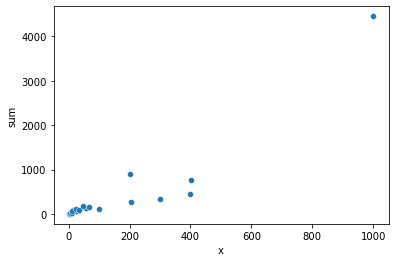

In [13]:
# Checking the relationship between indepedant and dependant variable
sns.scatterplot(data.x,data['sum'])
plt.show()

C:\Users\nivet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


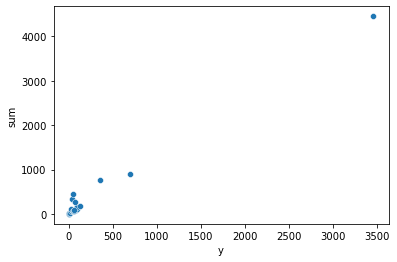

In [14]:
sns.scatterplot(data.y,data['sum'])
plt.show()

In [15]:
# since the relationship between the dependant and independanat variable are linear, we use linear regression

### Store Feature Matrix in X and Response (Target) in Vector y

In [17]:
X = data[['x','y']] # Our independant variables
y = data['sum']  # Dependant variables

### Perform the train/test split

    1. Split the data into two parts : Training and Test Set
    2. Train the model on training set
    3. Test the model on testing set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train

,x,y
10,13.0,78.0
6,55.0,80.0
8,23.0,45.0
17,400.0,45.7
21,1000.0,3456.0
9,56.0,78.0
20,45.7,123.7
18,34.6,56.9
15,200.0,700.0
13,23.6,89.3


### Import and train the model

In [25]:
# Using linear reg, as relationship between the variables is linear
from sklearn.linear_model import LinearRegression

In [27]:
# Creating instance of Linear Regression Model
model = LinearRegression()
# training the model with x and y train (Independant and Dependant variables)
model.fit(X_train,y_train)

LinearRegression()

### Check Model's Prediction Performance

In [28]:
model.score(X_train, y_train)

1.0

In [29]:
model.score(X_test,y_test)

1.0

### Comparing the results

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([756.5,   8. ,   2. ,  12. , 271.5,  66. , 122. ,  20. ])

In [34]:
y_test

19    756.5
1       8.0
0       2.0
2      12.0
16    271.5
5      66.0
7     122.0
3      20.0
Name: sum, dtype: float64

In [37]:
df = pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
df

,Actual,Prediction
19,756.5,756.5
1,8.0,8.0
0,2.0,2.0
2,12.0,12.0
16,271.5,271.5
5,66.0,66.0
7,122.0,122.0
3,20.0,20.0


### Prediction

In [39]:
model.predict([[10,20]])

array([30.])

In [40]:
model.predict([[17.2,7.7]])

array([24.9])

### Saving the model using Joblib

In [41]:
# If we save the model, model training is not needed again and again
import joblib

In [42]:
joblib.dump(model,'model_numsum')

['model_numsum']

In [43]:
model = joblib.load('model_numsum')

In [44]:
model.predict([[10,14]])

array([24.])

### GUI

In [45]:
X = data[['x','y']] # Our independant variables
y = data['sum']  # Dependant variables

In [47]:
model = LinearRegression()
# training model on entire dataset
model.fit(X,y)

LinearRegression()

In [48]:
import joblib
joblib.dump(model,'model_numsum')

['model_numsum']

In [49]:
model = joblib.load('model_numsum')

In [50]:
model.predict([[10,14]])

array([24.])

In [53]:
from tkinter import *
import joblib

In [74]:
window = Tk()
window.title("SUM USING ML")
window.geometry("200x200")

def show():
    p1 = float(e1.get())
    p2 = float(e2.get())
    
    model = joblib.load('model_numsum')
    result = model.predict([[p1,p2]])
    
    Label(window,text = 'Sum is').pack()
    Label(window, text = result).pack()
    print("Sum is ",result)

label = Label(window, text = 'Addition of 2 NO.s',bg = 'black', fg = 'white').pack()
text1 = Label(window,text = 'Enter First Number')
text1.pack()


e1 = Entry(window)
e1.pack()


text2 = Label(window,text = 'Enter Second Number')
text2.pack()

e2 = Entry(window)
e2.pack()

Button(window,text = 'Predict', command = show).pack()

window.mainloop()

Sum is  [17.]
